<a href="https://colab.research.google.com/github/Ignaciacb/Tareas-Algoritmos-y-estructuras-de-datos/blob/main/Tarea_6_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC3001 Otoño 2025 Tarea 6 [Ignacia Cejas Barra]
# Árboles Cartesianos

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Nelson Baloian •
Sección 3 Patricio Poblete




En esta tarea usted debe implementar árboles cartesianos, con las operaciones de insertar y eliminar. Usted debe entregar un link a su tarea en `colab`.

Antes de probar su implementación, ejecute primero las siguientes líneas de código.

In [ ]:
!pip install aed-utilities

import aed_utilities as aed

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 691.4 kB/s eta 0:00:00
  Created wheel for aed-utilities: filename=aed_utilities-0.5.6-py3-none-any.whl size=4541 sha256=f8fd71f27c2890203f225299d15351fd99adb91d5fb16f2dc74ef37bbe9a6ee5
  Stored in directory: /root/.cache/pip/wheels/e2/87/f8/223d5e6792e7b0fc909ef2cdb96ceb6a5336f428bc8eea7ffa
Successfully built aed-utilities


---
# Descripción de un árbol cartesiano

Un *árbol cartesiano* es un árbol binario en que cada nodo interno contiene un par ordenado $(x,y)$, tal que:

* Si se consideran las coordenadas $x$, el árbol es un ABB
* Si se consideran las coordenadas $y$, el árbol es un árbol de prioridad

La siguiente figura muestra a un árbol cartesiano en que la máxima prioridad corresponde al valor mínimo de $y$:

![cartesian-tree](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/cartesian-tree.png?raw=1)

Intuitivamente, podemos imaginar que la prioridad $y$ corresponde a la hora en que la llave $x$ ingresó al árbol. Esto explica que la raíz tenga el valor mínimo de $y$, y que estos valores vayan creciendo a medida que descendemos en el árbol.

Sin embargo, _no estamos obligados a insertar las llaves en orden cronológico_. En efecto, veremos que un nuevo par $(x,y)$ se puede insertar en cualquier momento, aunque su $y$ no sea mayor que los de los nodos que ya están en el árbol.

Para insertar un nuevo par ordenado en un árbol cartesiano, primero efectuamos una inserción como si fuera un ABB, con lo cual el nuevo nodo cumple con las restricciones "izquierda-derecha" en su coordenada $x$, pero posiblemente no con las restricciones de prioridad "arriba-abajo" de la coordenada $y$. Para corregir esto último, a continuación, hacemos una serie de rotaciones para que el nuevo nodo vaya "trepando" hasta que cumpla con las restricciones de prioridad.

También es posible eliminar un nodo dado de un árbol cartesiano. Para esto, una vez ubicado el nodo que contiene el $x$ que se va a eliminar, podemos imaginar que le cambiamos la prioridad a una prioridad pésima ("$+\infty$") y luego lo "hundimos" haciendo una serie de rotaciones, rotando siempre con el hijo de mejor prioridad (=valor de $y$ menor), hasta llegar al fondo. Una vez ahí, es trivial eliminarlo, porque no tiene hijos.

# La Tarea



En primer lugar, usted debe implementar las funciones `insert` y `delete` en la clase `Nodoi` y `Nodoe`. Puede crear todas las funciones auxiliares que requiera para implementar estos métodos. No está permitido usar ninguna función ya programada en módulos de Python. En caso de requerirla, puede utilizar la función predefinida `isinstance` de Python. Note que mientras usted no agregue su implementación de `insert` y `delete` en ambos tipos de nodos, el código no compilará correctamente.

In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info # el campo info contiene una tupla (x,y)
        self.der=der
    def right_rotation(self):
        return(Nodoi(self.izq.izq,
                     self.izq.info,
                     Nodoi(self.izq.der,self.info,self.der)))
    def left_rotation(self):
        return(Nodoi(Nodoi(self.izq,self.info,self.der.izq),
                     self.der.info,
                     self.der.der))
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def insert(self,xy): # insertar la tupla xy=(x,y) donde x es la llave e y es la prioridad
      # Inserción en un ABB
      assert xy != self.info
      if xy[0] < self.info[0]:
        arbol_post_insercion = Nodoi(self.izq.insert(xy), self.info, self.der) # Arbol post inserción igual al original pero cambiando el subarbol izquierdo por el nuevo con la inserción

      else: # xy[0] > self.info[0]
        arbol_post_insercion = Nodoi(self.izq, self.info, self.der.insert(xy)) # Arbol post inserción igual al original pero cambiando el subarbol derecho por el nuevo con la inserción

      # Una vez ya hecha la inserción como en un ABB, falta chaquer si se cumplen las condiciones de prioridad en la coordenada y, de no cumplirse deben hacerse las rotaciones necesarias
      if isinstance(arbol_post_insercion.der, Nodoi) and arbol_post_insercion.info[1] > arbol_post_insercion.der.info[1]: # Si la coordenada y del nodo derecho es menor que el del padre, entonces se debe hacer una rotación a la izquierda
        return arbol_post_insercion.left_rotation() # Se realiza una notación a la izquierda, para subir al hijo derecho del nodo

      if isinstance(arbol_post_insercion.izq, Nodoi) and arbol_post_insercion.info[1] > arbol_post_insercion.izq.info[1]: # Si la coordenada y del nodo izquierdo es menor que el del padre, entonces se debe hacer una rotación a la derecha
        return arbol_post_insercion.right_rotation() # Se realiza una notación a la derecha, para subir al hijo izquierdo del nodo

      else: # Si se cumplen las condiciones del arbol de prioridad en la coordenada y, entonces se retorna el árbol tal cual sin hacer alguna rotación
        return arbol_post_insercion

    def delete(self,x): # eliminar el nodo con llave x
        # Eliminación en un ABB
        # Buscamos la llave x en el árbol
        if x < self.info[0]: # Si la clave x es menor, debe estar en el subárbol izquierdo
          return Nodoi(self.izq.delete(x),self.info,self.der)

        elif x > self.info[0]: # Si la clave x es mayor, debe estar en el subárbol derecho
          return Nodoi(self.izq,self.info,self.der.delete(x))

        # Una vez que ya encontramos la llave, vemos la forma de eliminarla
        else: # x == self.info[0]:
          # llave sin hijos: se reemplaza el nodo interno que contiene a x con un nodo externo
          if isinstance(self, Nodoe):
            return None

          # llave con 1 hijo: el padre de la llave x pasa a apuntar al único hijo de x
          elif isinstance(self.izq,Nodoe): # No hay hijo izquierdo, entonces lo reemplazamos con su hijo derecho
            return self.der
          elif isinstance(self.der,Nodoe): # No hay hijo derecho, lo reemplazamos con su hijo izquierdo
            return self.izq

          else: # llave con 2 hijos: hay que hacer rotaciones para empujarlo hacia una hoja, comparando las propiedades con los hijos y haciendo una rotación con el hijo de mayor prioridad
            if isinstance(self.der, Nodoi) and isinstance(self.izq, Nodoi) and self.izq.info[1] < self.der.info[1]: # Si el hijo derecho es el con mayor prioridad
              arbol_post_rot = self.right_rotation() # Se hace una rotación con el derecho
              return Nodoi(arbol_post_rot.izq, arbol_post_rot.info, arbol_post_rot.der.delete(x)) # Retornamos el árbol
            else: # Si el hijo izquierdo es el con mayor prioridad
              arbol_post_rot = self.left_rotation() # Se hace una rotación con este
              return Nodoi(arbol_post_rot.izq.delete(x), arbol_post_rot.info, arbol_post_rot.der)


#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
class Nodoe:
    def __init__(self):
        pass
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def insert(self,xy): # insertar la tupla xy=(x,y) donde x es la llave e y es la prioridad
        # Escriba aquí su implementación
        return Nodoi(Nodoe(),xy,Nodoe())

    def delete(self,x): # eliminar el nodo con llave x
        # Escriba aquí su implementación
        return self
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
class ArbolCartesiano:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz
    def insert(self,xy):
        self.raiz=self.raiz.insert(xy)
    def delete(self,x):
        self.raiz=self.raiz.delete(x)

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe, drawNull=True, shapeInternal='oval')
      btd.draw_tree(self, "raiz")

Luego, pruebe su implementación con las siguientes operaciones (verifique con el dibujo de árbol que la operación se realizó correctamente)):

In [ ]:
a=ArbolCartesiano()
a.dibujar()

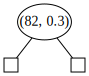

In [ ]:
a.insert((82,0.30))
a.dibujar()

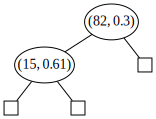

In [ ]:
a.insert((15,0.61))
a.dibujar()

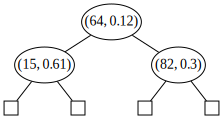

In [ ]:
a.insert((64,0.12))
a.dibujar()

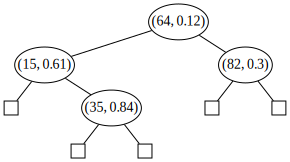

In [ ]:
a.insert((35,0.84))
a.dibujar()

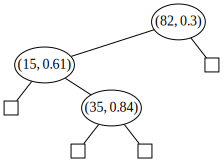

In [ ]:
a.delete(64)
a.dibujar()

Por último, pruebe su código con el siguiente programa:

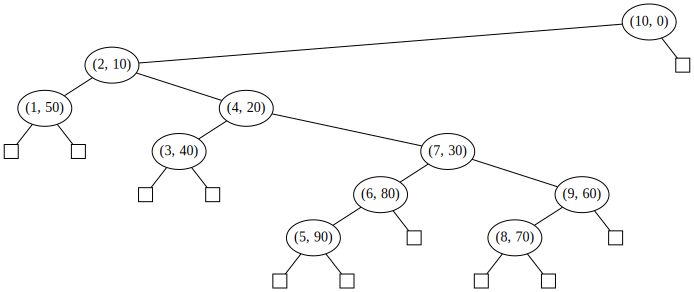

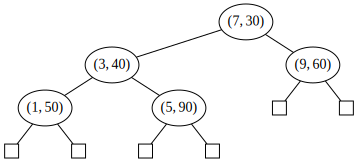

Su código pasó todos los tests, ¡felicitaciones!


In [ ]:
a = ArbolCartesiano()
a.insert((1,50))
a.insert((2,10))
a.insert((3,40))
a.insert((4,20))
a.insert((5,90))
a.insert((6,80))
a.insert((7,30))
a.insert((8,70))
a.insert((9,60))
a.insert((10,0))

a.dibujar()

assert a.raiz.info == (10, 0)
assert a.raiz.izq.info == (2, 10) and isinstance(a.raiz.der, Nodoe)
assert a.raiz.izq.izq.info == (1, 50) and a.raiz.izq.der.info == (4, 20)
assert isinstance(a.raiz.izq.izq.izq, Nodoe) and  isinstance(a.raiz.izq.izq.der, Nodoe) and a.raiz.izq.der.izq.info == (3, 40) and a.raiz.izq.der.der.info == (7, 30)
assert isinstance(a.raiz.izq.der.izq.izq, Nodoe) and isinstance(a.raiz.izq.der.izq.der, Nodoe) and a.raiz.izq.der.der.izq.info == (6, 80) and a.raiz.izq.der.der.der.info == (9, 60)
assert a.raiz.izq.der.der.izq.izq.info == (5, 90) and isinstance(a.raiz.izq.der.der.izq.der, Nodoe) and a.raiz.izq.der.der.der.izq.info == (8, 70) and isinstance(a.raiz.izq.der.der.der.der, Nodoe)
assert isinstance(a.raiz.izq.der.der.izq.izq.izq, Nodoe) and isinstance(a.raiz.izq.der.der.izq.izq.der, Nodoe) and isinstance(a.raiz.izq.der.der.der.izq.izq, Nodoe) and isinstance(a.raiz.izq.der.der.der.izq.der, Nodoe)

a.delete(2)
a.delete(6)
a.delete(10)
a.delete(8)
a.delete(4)

a.dibujar()

assert a.raiz.info == (7, 30)
assert a.raiz.izq.info == (3, 40) and a.raiz.der.info == (9, 60)
assert a.raiz.izq.izq.info == (1, 50) and a.raiz.izq.der.info == (5, 90) and isinstance(a.raiz.der.izq, Nodoe) and isinstance(a.raiz.der.der, Nodoe)
assert isinstance(a.raiz.izq.izq.izq, Nodoe) and isinstance(a.raiz.izq.izq.der, Nodoe) and isinstance(a.raiz.izq.der.izq, Nodoe) and isinstance(a.raiz.izq.der.der, Nodoe)

print("Su código pasó todos los tests, ¡felicitaciones!")

In [ ]:
class customPairs:
    def __init__(self, *args) -> None:
        self.pairs = []
        for pair in args:
            self.pairs.append(pair)
        self.__index = 0
    def add(self, pair):
        self.pairs.append(pair)
    def __iter__(self):
        return self
    def __next__(self):
        if self.__index < len(self.pairs):
            self.__index += 1
            return self.pairs[self.__index - 1]
        else:
            raise StopIteration
    def __contains__(self, pair):
        return pair in self.pairs
    def __getitem__(self, index):
        return self.pairs[index]
    def index(self, pair=None, left_obj=None):
        if pair is None and left_obj is None:
            raise ValueError("Debe entregar al menos un argumento")
        if pair is not None:
            if pair in self.pairs:
                return self.pairs.index(pair)
            return self.index(left_obj=pair)
        if left_obj is not None:
            for i, p in enumerate(self.pairs):
                if left_obj == p[0]:
                    return i
            return -1

def tester_cartesiando(clase_arbol, **kwargs):
    clase_arbol = kwargs["test_class"]
    casos_prueba = customPairs(
        # tests basicos enunciado
        (  # reconstrucción test paso a paso
            [ # instrucciones
                ('*', None)
            ],
            [ # verificaciones
                ('raiz', 'Nodoe')
            ]
        ),
        (
            [ # instrucciones
                ('i', 82, 0.30),
            ],
            [ # verificaciones
                ('raiz', 'Nodoi'),
                ('raiz_izq', 'Nodoe'),
                ('raiz_der', 'Nodoe'),
                ('raiz_info', (82, 0.30)),
            ]
        ),
        (
            [ # instrucciones
                ('i', 15, 0.61)
            ],
            [ # verificaciones
                ('raiz', 'Nodoi'),
                ('raiz_izq', 'Nodoi'),
                ('raiz_der', 'Nodoe'),
                ('raiz_info', (82, 0.30)),
                ('raiz_izq_info', (15, 0.61)),
                ('raiz_izq_izq', 'Nodoe'),
                ('raiz_izq_der', 'Nodoe'),
            ]
        ),
        (
            [ # instrucciones
                ('i', 64, 0.12)
            ],
            [ # verificaciones
                ('raiz', 'Nodoi'),
                ('raiz_izq', 'Nodoi'),
                ('raiz_der', 'Nodoi'),
                ('raiz_info', (64, 0.12)),
                ('raiz_izq_info', (15, 0.61)),
                ('raiz_izq_izq', 'Nodoe'),
                ('raiz_izq_der', 'Nodoe'),
                ('raiz_der_info', (82, 0.30)),
                ('raiz_der_izq', 'Nodoe'),
                ('raiz_der_der', 'Nodoe'),
            ]
        ),
        (
            [ # instrucciones
                ('i', 35, 0.84)
            ],
            [ # verificaciones
                ('raiz', 'Nodoi'),
                ('raiz_izq', 'Nodoi'),
                ('raiz_der', 'Nodoi'),
                ('raiz_info', (64, 0.12)),
                ('raiz_izq_info', (15, 0.61)),
                ('raiz_izq_izq', 'Nodoe'),
                ('raiz_izq_der', 'Nodoi'),
                ('raiz_izq_der_info', (35, 0.84)),
                ('raiz_izq_der_izq', 'Nodoe'),
                ('raiz_izq_der_der', 'Nodoe'),
                ('raiz_der_info', (82, 0.30)),
                ('raiz_der_izq', 'Nodoe'),
                ('raiz_der_der', 'Nodoe'),
            ]
        ),
        (
            [ # instrucciones
                ('d', 64)
            ],
            [ # verificaciones
                ('raiz', 'Nodoi'),
                ('raiz_izq', 'Nodoi'),
                ('raiz_der', 'Nodoe'),
                ('raiz_info', (82, 0.30)),
                ('raiz_izq_info', (15, 0.61)),
                ('raiz_izq_izq', 'Nodoe'),
                ('raiz_izq_der', 'Nodoi'),
                ('raiz_izq_der_info', (35, 0.84)),
                ('raiz_izq_der_izq', 'Nodoe'),
                ('raiz_izq_der_der', 'Nodoe'),
            ]
        ),
        ( # test basico enunciado 1 shot
            [ # instrucciones
                ('*', None),
                ('i', 82, 0.30),
                ('i', 15, 0.61),
                ('i', 64, 0.12),
                ('i', 35, 0.84),
                ('d', 64)
            ],
            [ # verificaciones
                ('raiz', 'Nodoi'),
                ('raiz_izq', 'Nodoi'),
                ('raiz_der', 'Nodoe'),
                ('raiz_info', (82, 0.30)),
                ('raiz_izq_info', (15, 0.61)),
                ('raiz_izq_izq', 'Nodoe'),
                ('raiz_izq_der', 'Nodoi'),
                ('raiz_izq_der_info', (35, 0.84)),
                ('raiz_izq_der_izq', 'Nodoe'),
                ('raiz_izq_der_der', 'Nodoe'),
            ]
        ),
        # test de robustez enunciado
        (
            [ # instrucciones
                ('*', None),
                ('i', 1, 50),
                ('i', 2, 10),
                ('i', 3, 40),
                ('i', 4, 20),
                ('i', 5, 90),
                ('i', 6, 80),
                ('i', 7, 30),
                ('i', 8, 70),
                ('i', 9, 60),
                ('i', 10, 0),
            ],
            [ # verificaciones
                ('raiz', 'Nodoi'),
                ('raiz_der', 'Nodoe'),
                ('raiz_izq', 'Nodoi'),
                ('raiz_info', (10, 0)),
                ('raiz_izq_info', (2, 10)),
                ('raiz_izq_izq', 'Nodoi'),
                ('raiz_izq_der', 'Nodoi'),
                ('raiz_izq_izq_info', (1, 50)),
                ('raiz_izq_der_info', (4, 20)),
                ('raiz_izq_izq_izq', 'Nodoe'),
                ('raiz_izq_izq_der', 'Nodoe'),
                ('raiz_izq_der_izq', 'Nodoi'),
                ('raiz_izq_der_der', 'Nodoi'),
                ('raiz_izq_der_izq_info', (3, 40)),
                ('raiz_izq_der_der_info', (7, 30)),
                ('raiz_izq_der_izq_izq', 'Nodoe'),
                ('raiz_izq_der_izq_der', 'Nodoe'),
                ('raiz_izq_der_der_izq', 'Nodoi'),
                ('raiz_izq_der_der_der', 'Nodoi'),
                ('raiz_izq_der_der_izq_info', (6, 80)),
                ('raiz_izq_der_der_der_info', (9, 60)),
                ('raiz_izq_der_der_izq_izq', 'Nodoi'),
                ('raiz_izq_der_der_izq_der', 'Nodoe'),
                ('raiz_izq_der_der_der_izq', 'Nodoi'),
                ('raiz_izq_der_der_der_der', 'Nodoe'),
                ('raiz_izq_der_der_izq_izq_info', (5, 90)),
                ('raiz_izq_der_der_der_izq_info', (8, 70)),
                ('raiz_izq_der_der_izq_izq_izq', 'Nodoe'),
                ('raiz_izq_der_der_izq_izq_der', 'Nodoe'),
                ('raiz_izq_der_der_der_izq_izq', 'Nodoe'),
                ('raiz_izq_der_der_der_izq_der', 'Nodoe'),
            ]
        ),
        (
            [ # instrucciones
                ('d', 2),
                ('d', 6),
                ('d', 10),
                ('d', 8),
                ('d', 4)
            ],
            [ # verificaciones
                ('raiz', 'Nodoi'),
                ('raiz_der', 'Nodoi'),
                ('raiz_izq', 'Nodoi'),
                ('raiz_info', (7, 30)),
                ('raiz_izq_info', (3, 40)),
                ('raiz_izq_izq', 'Nodoi'),
                ('raiz_izq_der', 'Nodoi'),
                ('raiz_izq_izq_info', (1, 50)),
                ('raiz_izq_der_info', (5, 90)),
                ('raiz_izq_izq_izq', 'Nodoe'),
                ('raiz_izq_izq_der', 'Nodoe'),
                ('raiz_izq_der_izq', 'Nodoe'),
                ('raiz_izq_der_der', 'Nodoe'),
                ('raiz_der_info', (9, 60)),
                ('raiz_der_izq', 'Nodoe'),
                ('raiz_der_der', 'Nodoe'),
            ]
        )
    )

    feedback, history = [], []
    arbol = None
    for test, esperado in casos_prueba:
        feedback = []

        try:
            arbol = interpret_tree(arbol, test, clase_arbol)
        except Exception as e:
            feedback.append(f"[ERROR] (Test {casos_prueba.index(test)})")
            feedback.append(f"    {e}")
            history.extend(feedback)
            yield feedback
            continue

        answer = check_tree(arbol, esperado)
        if answer is True:
            continue

        _, human_readable = answer
        feedback.append(f"[ERROR] (Test {casos_prueba.index(test)}) {test}")
        feedback.append(human_readable)
        history.extend(feedback)
        yield feedback

    feedback = []
    if not history:
        feedback.append("Pasa todos los tests")
    yield feedback

def findOccurrences(s:str, ch:str):
    idxs = []
    i = -1
    while (i := s.find(ch, i+1)) != -1:
        idxs.append(i)
    return idxs

def highlight_list_difference(gotten, expected):
    gotten_str = str(gotten)
    failure_idx = 0
    for i, (r, e) in enumerate(zip(gotten, expected)):
        if r != e:
            failure_idx = i
            break
    sep_idx = [0]+findOccurrences(gotten_str, '],')
    return f'    Diff idx:  {" "*(sep_idx[failure_idx]+2)}^'

def interpret_tree(tree, instructions, tree_class):
    try:
        for instruction in instructions:
            if instruction[0] == '*':
                tree = tree_class()
            elif instruction[0] == 'i':
                tree.insert((instruction[1], instruction[2]))
            elif instruction[0] == 'd':
                tree.delete(instruction[1])
    except Exception as e:
        raise Exception(f'Error al construir arbol en {instruction}\n\n{e}')
    return tree

def read_sequence(sequence):
    return sequence.split('_')

def check_tree(tree, validations):
    try:
        for sequence, expected in validations:
            steps = read_sequence(sequence)
            place = tree
            for i, step in enumerate(steps):
                if step == 'raiz':
                    place = place.raiz
                elif step == 'izq':
                    place = place.izq
                elif step == 'der':
                    place = place.der
                elif step == 'info':
                    place = place.info
            if expected in ['Nodoe', 'Nodoi']:
                if place.__class__.__name__ != expected:
                    raise Exception(f'Expected node class {expected} got {place.__class__.__name__}')
            elif isinstance(expected, tuple):
                if place != expected:
                    raise Exception(f'Expected {expected} got {place}')
    except Exception as e:
        sequence = sequence.replace('_', '.')
        human_readable = ''
        if 'object has no attribute' in str(e):
            human_readable += f'    Construcción erronea en {sequence}\n'
        else:
            human_readable += f'    Error en {sequence}\n'
        encontrado = place if isinstance(place, tuple) else place.__class__.__name__
        human_readable += f'        Se esperaba encontrar {expected} tras {i} pasos en la secuencia {sequence}\n'
        human_readable += f'        Se encontró {encontrado} en su lugar y se lanzó el error "{e}"\n'
        return False, human_readable
    return True


def test(**kwargs):
    if "function" in kwargs:
        for feedback in tester_cartesiando(kwargs["function"], **kwargs):
            yield feedback
    else:
        print("No se ha encontrado el metodo Arbol.infijo")
        yield None


if __name__ == '__main__':
    pass

for resultado in test(function=ArbolCartesiano, test_class=ArbolCartesiano):
    if resultado:
        for linea in resultado:
            print(linea)
